In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_sales = pd.read_csv('data/sku_sales.csv')
data_sales.head()

,order_id,store_id,sku_id,order_time,quantity,channel
0,202108310100005,1,317,2021-08-31 00:00:05,1.0,2
1,202108310100023,1,317,2021-08-31 00:00:23,2.0,2
2,202204260100049,1,317,2022-04-26 00:00:49,2.0,2
3,202207040100048,1,317,2022-07-04 00:00:48,2.0,2
4,202207060100029,1,317,2022-07-06 00:00:29,1.0,2


In [6]:
data_sales['date'] = pd.to_datetime(data_sales['order_time']).dt.date
data_sales

,order_id,store_id,sku_id,order_time,quantity,channel,date
0,202108310100005,1,317,2021-08-31 00:00:05,1.0,2,2021-08-31
1,202108310100023,1,317,2021-08-31 00:00:23,2.0,2,2021-08-31
2,202204260100049,1,317,2022-04-26 00:00:49,2.0,2,2022-04-26
3,202207040100048,1,317,2022-07-04 00:00:48,2.0,2,2022-07-04
4,202207060100029,1,317,2022-07-06 00:00:29,1.0,2,2022-07-06
...,...,...,...,...,...,...,...
16934240,202308260300510,3,652,2023-08-26 00:08:30,1.0,2,2023-08-26
16934241,202308260500228,5,652,2023-08-26 00:03:48,1.0,2,2023-08-26
16934242,202308261202716,12,652,2023-08-26 00:45:16,1.0,1,2023-08-26
16934243,202308231201236,12,652,2023-08-23 00:20:36,1.0,1,2023-08-23


In [7]:
data_sales_quantity = data_sales.groupby(['store_id', 'sku_id', 'date', 'channel']).agg({'quantity': 'sum'}).reset_index()
data_sales_quantity

,store_id,sku_id,date,channel,quantity
0,1,1,2022-05-23,2,1.0
1,1,1,2022-05-28,2,3.0
2,1,1,2022-05-29,2,2.0
3,1,1,2022-05-30,2,1.0
4,1,1,2022-05-31,2,1.0
...,...,...,...,...,...
4130680,12,1000,2023-08-27,2,1.0
4130681,12,1000,2023-08-28,2,1.0
4130682,12,1000,2023-08-29,2,2.0
4130683,12,1000,2023-08-31,1,1.0


In [8]:
# 画出每个sku的销量走势图
data_sales_quantity_1 = data_sales_quantity[data_sales_quantity['store_id'] == 1]
data_sales_quantity_1_sku = data_sales_quantity_1.groupby(['sku_id', 'date']).agg({'quantity': 'sum'}).reset_index()
data_sales_quantity_1_sku

,sku_id,date,quantity
0,1,2022-05-23,1.0
1,1,2022-05-28,3.0
2,1,2022-05-29,2.0
3,1,2022-05-30,1.0
4,1,2022-05-31,1.0
...,...,...,...
233874,1000,2023-08-25,1.0
233875,1000,2023-08-26,4.0
233876,1000,2023-08-28,2.0
233877,1000,2023-08-29,4.0


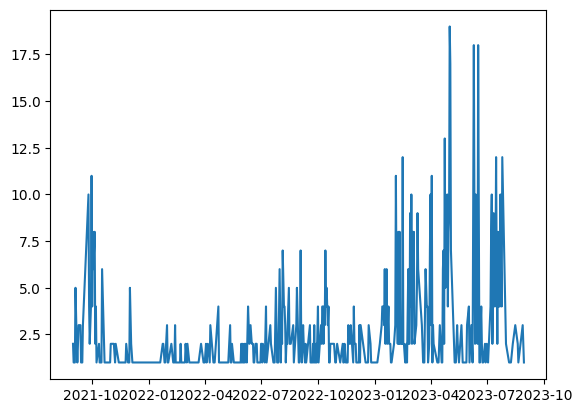

In [18]:
# 画出每个sku的销量走势图
for sku_id in data_sales_quantity_1_sku['sku_id'].unique()[9:10]:
    data_sales_quantity_1_sku_1 = data_sales_quantity_1_sku[data_sales_quantity_1_sku['sku_id'] == sku_id]
    plt.plot(data_sales_quantity_1_sku_1['date'], data_sales_quantity_1_sku_1['quantity'], label=sku_id)

In [20]:
data_sales_quantity_2 = data_sales_quantity[data_sales_quantity['store_id'] == 2]
data_sales_quantity_2_sku = data_sales_quantity_2.groupby(['sku_id', 'date']).agg({'quantity': 'sum'}).reset_index()
data_sales_quantity_2_sku

,sku_id,date,quantity
0,1,2022-05-26,1.0
1,1,2022-05-27,1.0
2,1,2022-05-28,2.0
3,1,2022-05-29,1.0
4,1,2022-06-01,1.0
...,...,...,...
238157,999,2023-08-30,5.0
238158,1000,2023-08-26,1.0
238159,1000,2023-08-27,3.0
238160,1000,2023-08-28,1.0


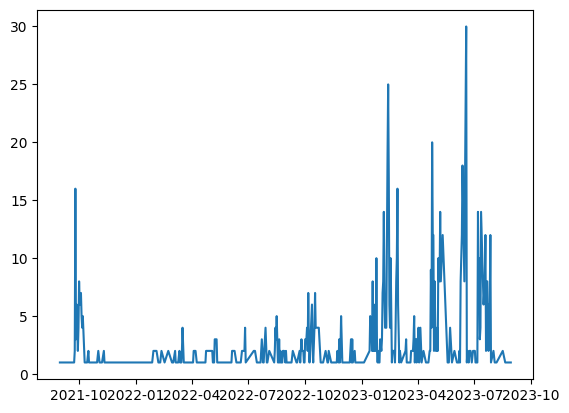

In [21]:
# 画出每个sku的销量走势图
for sku_id in data_sales_quantity_2_sku['sku_id'].unique()[9:10]:
    data_sales_quantity_2_sku_2 = data_sales_quantity_2_sku[data_sales_quantity_2_sku['sku_id'] == sku_id]
    plt.plot(data_sales_quantity_2_sku_2['date'], data_sales_quantity_2_sku_2['quantity'], label=sku_id)

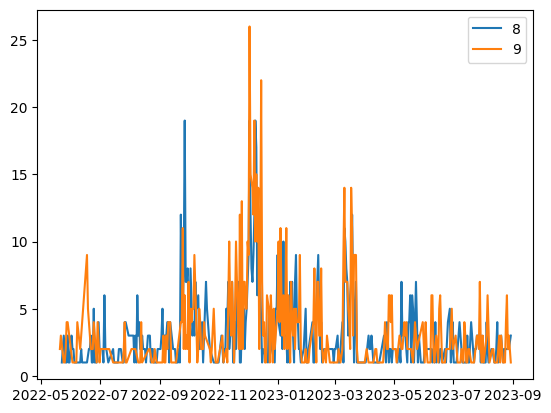

In [31]:
for store_id in data_sales_quantity['store_id'].unique()[7:9]:
    data_sales_quantity_store = data_sales_quantity[data_sales_quantity['store_id'] == store_id]
    data_sales_quantity_store_sku = data_sales_quantity_store.groupby(['sku_id', 'date']).agg({'quantity': 'sum'}).reset_index()
    # 画出每个sku的销量走势图
    for sku_id in data_sales_quantity_store_sku['sku_id'].unique()[:1]:
        data_sales_quantity_store_sku_sku = data_sales_quantity_store_sku[data_sales_quantity_store_sku['sku_id'] == sku_id]
        plt.plot(data_sales_quantity_store_sku_sku['date'], data_sales_quantity_store_sku_sku['quantity'], label=store_id)
    plt.legend()
plt.show()


In [33]:
data_sales_quantity_sum = data_sales_quantity.groupby(['store_id', 'sku_id', 'date']).agg({'quantity': 'sum'}).reset_index()
data_sales_quantity_sum

,store_id,sku_id,date,quantity
0,1,1,2022-05-23,1.0
1,1,1,2022-05-28,3.0
2,1,1,2022-05-29,2.0
3,1,1,2022-05-30,1.0
4,1,1,2022-05-31,1.0
...,...,...,...,...
2751318,12,1000,2023-08-26,1.0
2751319,12,1000,2023-08-27,2.0
2751320,12,1000,2023-08-28,1.0
2751321,12,1000,2023-08-29,2.0


In [35]:
data_sales_quantity_max = data_sales_quantity_sum.groupby(['store_id', 'sku_id']).agg({'quantity': 'max'}).reset_index()
data_sales_quantity_max.head()

,store_id,sku_id,quantity
0,1,1,18.0
1,1,2,23.0
2,1,3,31.0
3,1,4,15.0
4,1,5,116.0


In [37]:
# store_id从1-12，sku_id从1-1000，order_time从2023-08-18到2023-08-31
store_ids = list(range(1, 13))
sku_ids = list(range(1, 1001))
dates = pd.date_range('2023-09-01', '2023-09-14').date

# 生成store_id, sku_id, order_time的笛卡尔积
cartesian = pd.MultiIndex.from_product([store_ids, sku_ids, dates], names=['store_id', 'sku_id', 'date'])
data_now_stocks = pd.DataFrame(cartesian.to_frame(), columns=['store_id', 'sku_id', 'date']).reset_index(drop=True)
data_now_stocks

,store_id,sku_id,date
0,1,1,2023-09-01
1,1,1,2023-09-02
2,1,1,2023-09-03
3,1,1,2023-09-04
4,1,1,2023-09-05
...,...,...,...
167995,12,1000,2023-09-10
167996,12,1000,2023-09-11
167997,12,1000,2023-09-12
167998,12,1000,2023-09-13


In [38]:
# 将data_sales_quantity_max的值填充到data_now_stocks中
data_now_stocks = pd.merge(data_now_stocks, data_sales_quantity_max, how='left', on=['store_id', 'sku_id'])
data_now_stocks

,store_id,sku_id,date,quantity
0,1,1,2023-09-01,18.0
1,1,1,2023-09-02,18.0
2,1,1,2023-09-03,18.0
3,1,1,2023-09-04,18.0
4,1,1,2023-09-05,18.0
...,...,...,...,...
167995,12,1000,2023-09-10,3.0
167996,12,1000,2023-09-11,3.0
167997,12,1000,2023-09-12,3.0
167998,12,1000,2023-09-13,3.0


In [42]:
data_now_stocks['quantity'].fillna(0, inplace=True)
data_now_stocks.rename(columns={'quantity': 'x_k'}, inplace=True)
data_now_stocks['x_m'] = 0

In [43]:
data_now_stocks

,store_id,sku_id,date,x_k,x_m
0,1,1,2023-09-01,18.0,0
1,1,1,2023-09-02,18.0,0
2,1,1,2023-09-03,18.0,0
3,1,1,2023-09-04,18.0,0
4,1,1,2023-09-05,18.0,0
...,...,...,...,...,...
167995,12,1000,2023-09-10,3.0,0
167996,12,1000,2023-09-11,3.0,0
167997,12,1000,2023-09-12,3.0,0
167998,12,1000,2023-09-13,3.0,0


In [44]:
data_now_stocks.to_csv('data/test/test_result_max.csv', index=False)

In [45]:
data_sales_quantity_min_date = data_sales_quantity.groupby(['store_id', 'sku_id']).agg({'date': 'min'}).reset_index()
data_sales_quantity_min_date

,store_id,sku_id,date
0,1,1,2022-05-23
1,1,2,2021-08-31
2,1,3,2021-08-31
3,1,4,2021-09-22
4,1,5,2021-08-31
...,...,...,...
11937,12,996,2023-08-19
11938,12,997,2023-08-19
11939,12,998,2023-08-18
11940,12,999,2023-08-18


In [49]:
temp = data_sales_quantity_min_date['date'].to_numpy()
temp

array([datetime.date(2022, 5, 23), datetime.date(2021, 8, 31),
       datetime.date(2021, 8, 31), ..., datetime.date(2023, 8, 18),
       datetime.date(2023, 8, 18), datetime.date(2023, 8, 25)],
      dtype=object)

In [50]:
temp.sort()

In [51]:
temp

array([datetime.date(2021, 8, 31), datetime.date(2021, 8, 31),
       datetime.date(2021, 8, 31), ..., datetime.date(2023, 8, 30),
       datetime.date(2023, 8, 30), datetime.date(2023, 8, 30)],
      dtype=object)

In [61]:
# 对temp这个时间array进行统计，并画图
temp_df = pd.DataFrame(temp, columns=['date'])
temp_df['month'] = pd.to_datetime(temp_df['date']).dt.year.apply(str) + '-' + pd.to_datetime(temp_df['date']).dt.month.apply(str)
temp_df

,date,month
0,2021-08-31,2021-8
1,2021-08-31,2021-8
2,2021-08-31,2021-8
3,2021-08-31,2021-8
4,2021-08-31,2021-8
...,...,...
11937,2023-08-29,2023-8
11938,2023-08-30,2023-8
11939,2023-08-30,2023-8
11940,2023-08-30,2023-8


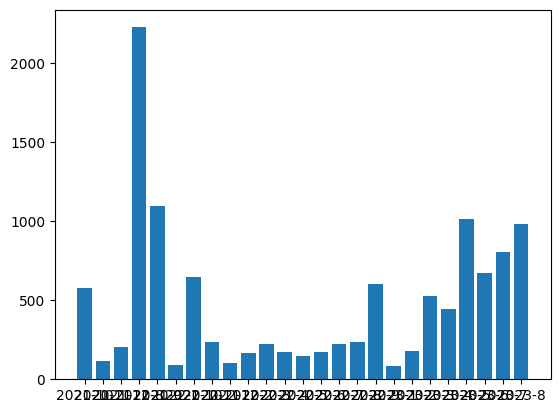

In [63]:
temp_month = temp_df['month'].to_numpy()
# 对temp_month这个str array求出现次数，并画柱状图
temp_month_count = np.unique(temp_month, return_counts=True)
plt.bar(temp_month_count[0], temp_month_count[1])
plt.show()